In [1]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [2]:
dataframe = pandas.read_csv("/content/forestfires (1).csv")

In [3]:
# Encode Data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)


In [4]:
print("Head:", dataframe.head())


Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0     

In [5]:
print("Statistical Description:", dataframe.describe())


Statistical Description:             month         day        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     7.475822    4.259188   90.644681  110.872340  547.940039    9.021663   
std      2.275990    2.072929    5.520111   64.046482  248.066192    4.559477   
min      1.000000    1.000000   18.700000    1.100000    7.900000    0.000000   
25%      7.000000    2.000000   90.200000   68.600000  437.700000    6.500000   
50%      8.000000    5.000000   91.600000  108.300000  664.200000    8.400000   
75%      9.000000    6.000000   92.900000  142.400000  713.900000   10.800000   
max     12.000000    7.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain  ...    monthdec  \
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000   
mean    18.889168   44.288201    4.017602    0.021663  ...    0.017408   
std      5.806625   16.

In [6]:
print("Shape:", dataframe.shape)


Shape: (517, 31)


In [7]:
print("Data Types:", dataframe.dtypes)


Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [8]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.059396 -0.107921 -0

<ipython-input-8-0c8e19ae5e1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("Correlation:", dataframe.corr(method='pearson'))


In [9]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]

In [10]:
# Feature Selection
from sklearn.feature_selection import RFE

model = ExtraTreesRegressor()
rfe = RFE(estimator=model, n_features_to_select=1)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_)


Number of Features:  1
Selected Features:  [False  True False False False False False False False False False False]
Feature Ranking:  [12  1 10 11  9  8  7  6  5  4  3  2]


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

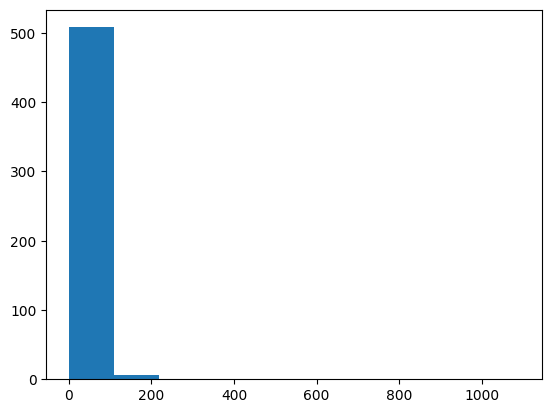

In [11]:
plt.hist((dataframe.area))


array([[<Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>],
       [<Axes: title={'center': 'ISI'}>,
        <Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'dayfri'}>,
        <Axes: title={'center': 'daymon'}>,
        <Axes: title={'center': 'daysat'}>,
        <Axes: title={'center': 'daysun'}>],
       [<Axes: title={'center': 'daythu'}>,
        <Axes: title={'center': 'daytue'}>,
        <Axes: title={'center': 'daywed'}>,
        <Axes: title={'center': 'monthapr'}>,
        <Axes: title={'center': 'monthaug'}>],
       [<Axes: title={'center': 'monthdec'}>,
        <Axes: title={'center': 'monthfeb'}>,
        <Axes: title={'center': 'monthjan'}>,
        <Axes: tit

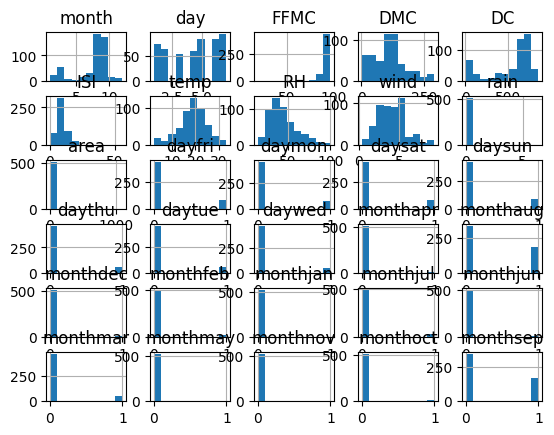

In [12]:
dataframe.hist()


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

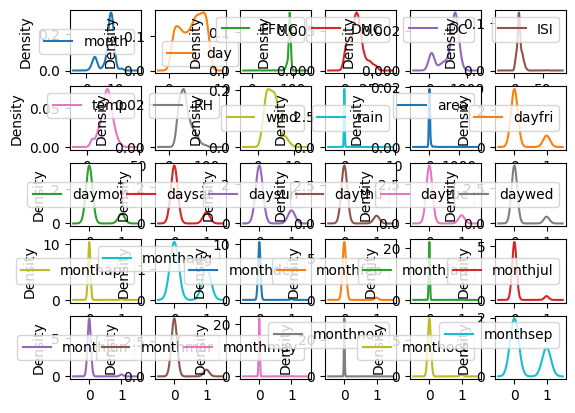

In [13]:
dataframe.plot(kind='density', subplots=True, layout=(5, 6), sharex=False, sharey=False)


month          Axes(0.125,0.747241;0.110714x0.132759)
day         Axes(0.257857,0.747241;0.110714x0.132759)
FFMC        Axes(0.390714,0.747241;0.110714x0.132759)
DMC         Axes(0.523571,0.747241;0.110714x0.132759)
DC          Axes(0.656429,0.747241;0.110714x0.132759)
ISI         Axes(0.789286,0.747241;0.110714x0.132759)
temp           Axes(0.125,0.587931;0.110714x0.132759)
RH          Axes(0.257857,0.587931;0.110714x0.132759)
wind        Axes(0.390714,0.587931;0.110714x0.132759)
rain        Axes(0.523571,0.587931;0.110714x0.132759)
area        Axes(0.656429,0.587931;0.110714x0.132759)
dayfri      Axes(0.789286,0.587931;0.110714x0.132759)
daymon         Axes(0.125,0.428621;0.110714x0.132759)
daysat      Axes(0.257857,0.428621;0.110714x0.132759)
daysun      Axes(0.390714,0.428621;0.110714x0.132759)
daythu      Axes(0.523571,0.428621;0.110714x0.132759)
daytue      Axes(0.656429,0.428621;0.110714x0.132759)
daywed      Axes(0.789286,0.428621;0.110714x0.132759)
monthapr        Axes(0.125,0

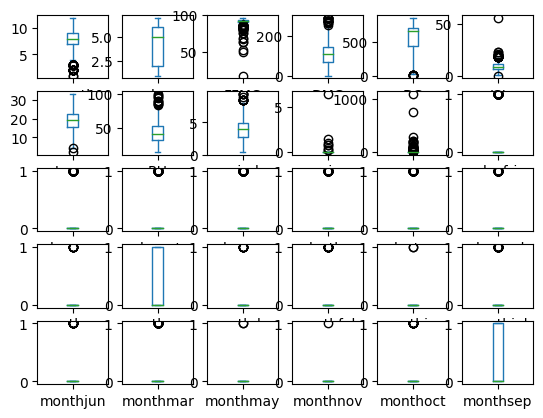

In [14]:
dataframe.plot(kind='box', subplots=True, layout=(5,6), sharex=False, sharey=False)

array([[<Axes: xlabel='month', ylabel='month'>,
        <Axes: xlabel='day', ylabel='month'>,
        <Axes: xlabel='FFMC', ylabel='month'>,
        <Axes: xlabel='DMC', ylabel='month'>,
        <Axes: xlabel='DC', ylabel='month'>,
        <Axes: xlabel='ISI', ylabel='month'>,
        <Axes: xlabel='temp', ylabel='month'>,
        <Axes: xlabel='RH', ylabel='month'>,
        <Axes: xlabel='wind', ylabel='month'>,
        <Axes: xlabel='rain', ylabel='month'>,
        <Axes: xlabel='area', ylabel='month'>,
        <Axes: xlabel='dayfri', ylabel='month'>,
        <Axes: xlabel='daymon', ylabel='month'>,
        <Axes: xlabel='daysat', ylabel='month'>,
        <Axes: xlabel='daysun', ylabel='month'>,
        <Axes: xlabel='daythu', ylabel='month'>,
        <Axes: xlabel='daytue', ylabel='month'>,
        <Axes: xlabel='daywed', ylabel='month'>,
        <Axes: xlabel='monthapr', ylabel='month'>,
        <Axes: xlabel='monthaug', ylabel='month'>,
        <Axes: xlabel='monthdec', ylabel='mo

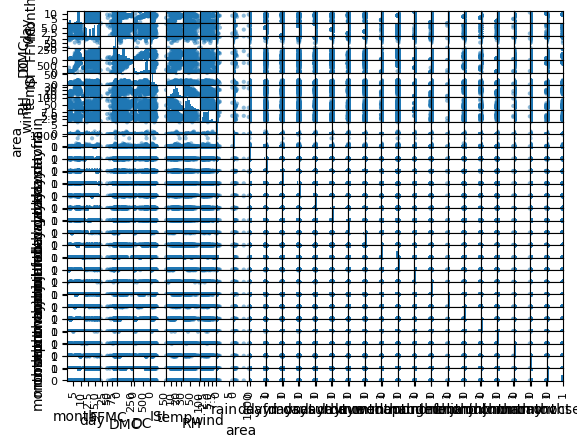

In [15]:
scatter_matrix(dataframe)


<ipython-input-16-b52a067459cb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)


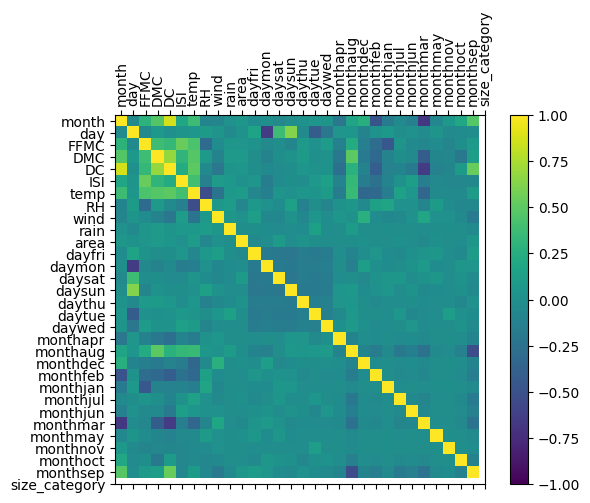

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0, len(dataframe.columns), 1)  # Use the number of columns as the number of ticks
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns, rotation=90)  # Rotate x-axis tick labels for better readability
ax.set_yticklabels(dataframe.columns)

plt.show()  # Don't forget to display the plot


In [17]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []
for name, model in models:
    # Fit the model
    model.fit(X, Y)

    predictions = model.predict(X)

    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)

    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.447533 (0.201420)
Ridge: 0.447531 (0.201400)
Lasso: 0.009655 (0.243617)
ElasticNet: 0.011149 (0.243027)
Bag_Re: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.389358 (0.148549)
CART: 1.000000 (0.000000)
SVM: 0.007164 (0.213090)


In [18]:
Y = numpy.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [19]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, RegressorMixin

# Define your baseline model function
def baseline_model():
    # Create the model
    model = Sequential()
    model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Create a custom KerasRegressor class for regression tasks
class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self):
        self.model = None

    def fit(self, X, y):
        self.model = baseline_model()
        self.model.fit(X, y, epochs=600, batch_size=5, verbose=0)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Create a pipeline with standardization and your custom KerasRegressor
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('keras', KerasRegressor()))
model = Pipeline(estimators)

kfold = KFold(n_splits=30, shuffle=True, random_state=seed)  # Set shuffle=True
results = cross_val_score(model, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 57ms/step


1/1 [==============================] - 0s 60ms/step
Results: 0.14 (0.53) MSE
